<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>SVM, Kernel Trick (практика)</center></h2>

**Срок сдачи:** 24 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 24 апреля, -4 балла после 06:00 1 мая, -6 баллов после 06:00 8 мая

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# Семинарская часть

Функция `select_model` принимает на вход обучающую выборку и возвращает модель (машину опорных векторов) с наилучшими параметрами для данной выборки. Эту функцию нужно реализовать.

Подбираемые параметры подели включают в себя:
- различные функции ядра (линейное, RBF, полиномиальные разных степеней)
- различные значения константы $C$ ($0, 0.1, 1, 10, 100, 1000, 10000$)

Подбирать параметры необходимо с помощью 10-fold кросс-валидации. Сейчас в качестве заглушки функция всегда возвращает линейный SVC.

In [4]:
from sklearn.grid_search import GridSearchCV

In [5]:
from sklearn.grid_search import GridSearchCV
model = SVC()
param_grid = {'C':[1,2], 'kernel':['linear']}
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=10)
grid.fit(x,y)

NameError: name 'x' is not defined

In [9]:
grid.best_score_

0.9

In [26]:
param_grid?

In [42]:
def select_model(x, y):
    """
    Implement some model selection strategy here:
    seek through different kernels and parameters.

    Use a validation scheme to select the best model
    
    Quality metric: accuracy

    Returns:
        SVM classifier implemented by sklearn SVC class.
    """
    best_accuracy = 0
    best_model = None
    
    model = SVC()
    param_grid = [{'C':[0.1, 1, 10, 100, 1000, 10000],
                  'kernel':['linear']},
                  {'C':[0.1, 1, 10, 100, 1000, 10000],
                  'kernel':['poly'],
                  'degree':[2,3]},
                  {'C':[0.1, 1, 10, 100, 1000, 10000],
                  'kernel':['rbf'],
                  'degree':[2,3],
                  'gamma':['auto']}]

    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=10, verbose=0)
    grid.fit(x,y)
    
    accuracy = np.mean(cross_val_score(model, x, y))

    best_model = model
    best_accuracy = accuracy
    
    best_model.fit(x, y)
    print "Best model %s, with accuracy %f" % (best_model, best_accuracy)
    return best_model

Далее две вспомогательные функции, которые отображают данные и разделяющую поверхность

In [34]:
def plot_data_set(x, y, description=''):
    print "Plotting data set points"
    plt.figure(figsize=(8, 8))

    colors = np.array(['r', 'b'])[y]
    plt.title(description, fontsize='small')
    plt.scatter(x[:, 0], x[:, 1], marker='o', c=colors, s=50)
    
def plot_decision_region(x1_min, x2_min, x1_max, x2_max, clf, n_points=1000):
    print "Plotting decision region"
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, n_points), np.linspace(x2_min, x2_max, n_points))
    z = clf.decision_function(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

    plt.contour(x1, x2, z, levels=[0.0], linestyles='solid', linewidths=2.0)
    plt.contour(x1, x2, z, levels=[-1.0, 1.0], linestyles='dashed', linewidths=1.0)

Generating 'Linearly-separated' data set
Best model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.929534
Plotting data set points
Plotting decision region


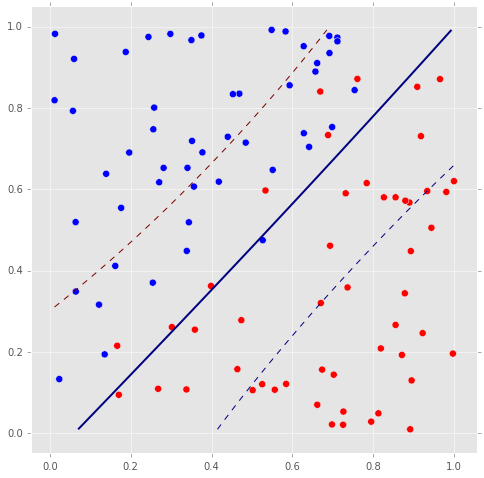

In [43]:
def generate_linear(size=100, k=1.1, b=0.0, nl=0.1):
    print "Generating 'Linearly-separated' data set"

    x = np.random.random((size, 2))
    y = np.zeros(size, dtype=int)
    noise = np.random.randn(size) * nl
    y[x[:, 1] - (k * x[:, 0] + b) > noise] = 1

    return x, y

x, y = generate_linear()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Concentric circles' data set
Best model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.979779
Plotting data set points
Plotting decision region


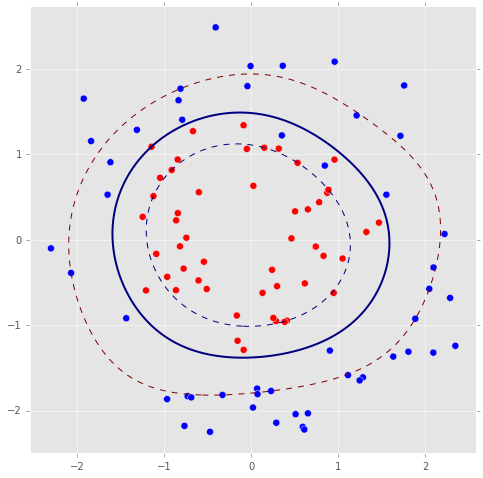

In [ ]:
def generate_concentric(size=100, r1=1.0, r2=2.0, sigma=0.3):
    print "Generating 'Concentric circles' data set"
    x = np.zeros((size, 2))
    x[:size/2, 0] = sigma * np.random.randn(size/2) + r1
    x[size/2:, 0] = sigma * np.random.randn(size/2) + r2
    x[:, 1] = (np.random.random(size) - 0.5) * 2 * np.pi
    y = np.hstack([np.zeros(size/2, dtype=int), np.ones(size/2, dtype=int)])

    z = np.zeros((size, 2))
    z[:, 0] = x[:, 0] * np.cos(x[:, 1])
    z[:, 1] = x[:, 0] * np.sin(x[:, 1])

    return z, y

x, y = generate_concentric()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

In [ ]:
def generate_sin(size=200):
    print "Generating 'Sinus-separated' data set"

    x = np.random.random((size, 2))
    x[:, 0] = x[:, 0] * 4 * np.pi
    x[:, 1] = (x[:, 1] - 0.5) * 2
    y = np.zeros(size, dtype=int)
    y[x[:, 1] > np.sin(x[:, 0])] = 1

    return x, y

x, y = generate_sin()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Sinus-separated' data set


# Регрессия с SVM (3 балла)

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (z-score) и выведите их на графике.

In [9]:
# Your Code Here
df = pd.read_csv('data/titanium.csv')
df.head()

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


In [10]:
X = df.x.values.reshape(-1,1)
X = (X - X.mean())/X.std()
y = df.y.values

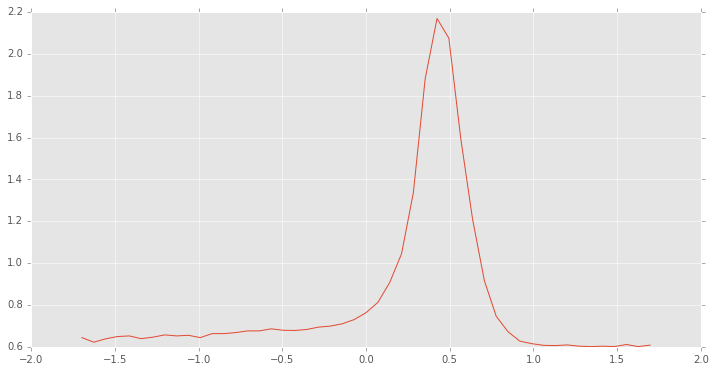

In [11]:
plt.plot(X, y)

## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Пусть `C = np.logspace(-2, 2, 10)`. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ каждого из ядер постройте график с данными и предстазанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

In [40]:
from sklearn.metrics import mean_absolute_error
from sklearn.grid_search import GridSearchCV

In [41]:
C = np.logspace(-2, 2, 10)

In [42]:
## Your Code Here
def get_grid(X, y, param_grid):
    
    model = SVR(epsilon=0.01)
    
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=10, verbose=0)
    grid.fit(X, y)

    return grid

In [43]:
linear_grid = get_grid(X, y, {'C':C, 'kernel':['linear']})

In [44]:
linear_grid.grid_scores_

[mean: -0.20247, std: 0.29408, params: {'kernel': 'linear', 'C': 0.01},
 mean: -0.20699, std: 0.29246, params: {'kernel': 'linear', 'C': 0.027825594022071243},
 mean: -0.20907, std: 0.29208, params: {'kernel': 'linear', 'C': 0.077426368268112694},
 mean: -0.20928, std: 0.29277, params: {'kernel': 'linear', 'C': 0.21544346900318834},
 mean: -0.20920, std: 0.29284, params: {'kernel': 'linear', 'C': 0.59948425031894093},
 mean: -0.20933, std: 0.29278, params: {'kernel': 'linear', 'C': 1.6681005372000592},
 mean: -0.20934, std: 0.29277, params: {'kernel': 'linear', 'C': 4.6415888336127775},
 mean: -0.20937, std: 0.29276, params: {'kernel': 'linear', 'C': 12.915496650148826},
 mean: -0.20914, std: 0.29283, params: {'kernel': 'linear', 'C': 35.938136638046259},
 mean: -0.20928, std: 0.29280, params: {'kernel': 'linear', 'C': 100.0}]

In [45]:
poly_grid = get_grid(X, y, {'C':C, 'kernel':['poly'], 'degree':[3], 'gamma':[6], 'coef0':[1]})

In [47]:
poly_grid.grid_scores_

[mean: -0.19419, std: 0.27485, params: {'kernel': 'poly', 'C': 0.01, 'coef0': 1, 'gamma': 6, 'degree': 3},
 mean: -0.19553, std: 0.27459, params: {'kernel': 'poly', 'C': 0.027825594022071243, 'coef0': 1, 'gamma': 6, 'degree': 3},
 mean: -0.19574, std: 0.27442, params: {'kernel': 'poly', 'C': 0.077426368268112694, 'coef0': 1, 'gamma': 6, 'degree': 3},
 mean: -0.19689, std: 0.27454, params: {'kernel': 'poly', 'C': 0.21544346900318834, 'coef0': 1, 'gamma': 6, 'degree': 3},
 mean: -0.19636, std: 0.27307, params: {'kernel': 'poly', 'C': 0.59948425031894093, 'coef0': 1, 'gamma': 6, 'degree': 3},
 mean: -0.19669, std: 0.27431, params: {'kernel': 'poly', 'C': 1.6681005372000592, 'coef0': 1, 'gamma': 6, 'degree': 3},
 mean: -0.19673, std: 0.27468, params: {'kernel': 'poly', 'C': 4.6415888336127775, 'coef0': 1, 'gamma': 6, 'degree': 3},
 mean: -0.19727, std: 0.27528, params: {'kernel': 'poly', 'C': 12.915496650148826, 'coef0': 1, 'gamma': 6, 'degree': 3},
 mean: -0.19813, std: 0.27557, params: {

In [48]:
rbf_grid = get_grid(X, y, {'C':C, 'kernel':['rbf'], 'gamma':[6], 'coef0':[1]})

In [49]:
rbf_grid.grid_scores_

[mean: -0.16020, std: 0.28616, params: {'kernel': 'rbf', 'C': 0.01, 'coef0': 1, 'gamma': 6},
 mean: -0.15025, std: 0.26506, params: {'kernel': 'rbf', 'C': 0.027825594022071243, 'coef0': 1, 'gamma': 6},
 mean: -0.13380, std: 0.22981, params: {'kernel': 'rbf', 'C': 0.077426368268112694, 'coef0': 1, 'gamma': 6},
 mean: -0.11425, std: 0.18584, params: {'kernel': 'rbf', 'C': 0.21544346900318834, 'coef0': 1, 'gamma': 6},
 mean: -0.10257, std: 0.15504, params: {'kernel': 'rbf', 'C': 0.59948425031894093, 'coef0': 1, 'gamma': 6},
 mean: -0.11524, std: 0.14183, params: {'kernel': 'rbf', 'C': 1.6681005372000592, 'coef0': 1, 'gamma': 6},
 mean: -0.12469, std: 0.15061, params: {'kernel': 'rbf', 'C': 4.6415888336127775, 'coef0': 1, 'gamma': 6},
 mean: -0.11200, std: 0.13452, params: {'kernel': 'rbf', 'C': 12.915496650148826, 'coef0': 1, 'gamma': 6},
 mean: -0.10844, std: 0.10918, params: {'kernel': 'rbf', 'C': 35.938136638046259, 'coef0': 1, 'gamma': 6},
 mean: -0.09967, std: 0.10442, params: {'kern

Построим графики -(ошибка) для удобства, ведь нам важна близость к нулю, а не + -

In [50]:
error = list()
for i in xrange(10):
    error.append(linear_grid.grid_scores_[i][1])
    error.append(poly_grid.grid_scores_[i][1])
    error.append(rbf_grid.grid_scores_[i][1])

In [51]:
error = np.array(error)

In [52]:
error = error.reshape(10,3)

In [53]:
error

array([[-0.2024703 , -0.19419039, -0.1602027 ],
       [-0.20699427, -0.19552977, -0.15025477],
       [-0.20907464, -0.19573853, -0.13379741],
       [-0.20928393, -0.1968855 , -0.11424664],
       [-0.20920161, -0.19635956, -0.10257297],
       [-0.20932903, -0.19668779, -0.11523872],
       [-0.20934165, -0.19673073, -0.12469294],
       [-0.20936832, -0.19726555, -0.11200471],
       [-0.20913918, -0.19812858, -0.10843689],
       [-0.20927971, -0.19339218, -0.0996659 ]])

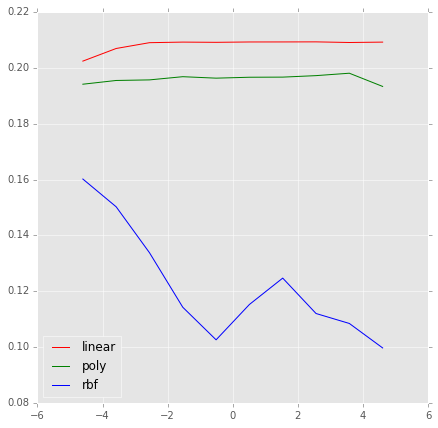

In [54]:
labels = ['linear', 'poly', 'rbf']
colors = ['red', 'green', 'blue']
plt.figure(figsize=(7,7))
for i in xrange(3):
    plt.plot(np.log(C), -error[:,i], label=labels[i], c=colors[i])
plt.legend(loc=3)
plt.show()

Построим графики для лучших значений $C$

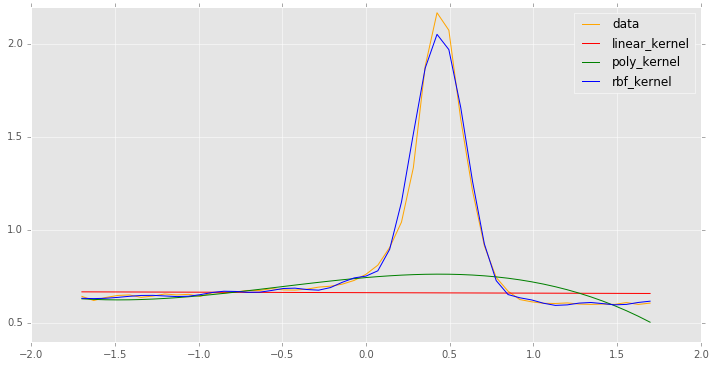

In [55]:
plt.plot(X, y, label='data', c='orange')
colors = ['red', 'green', 'blue']
plt.plot(X, linear_grid.best_estimator_.fit(X, y).predict(X), label='linear_kernel', c=colors[0])
plt.plot(X, poly_grid.best_estimator_.fit(X, y).predict(X), label='poly_kernel', c=colors[1])
plt.plot(X, rbf_grid.best_estimator_.fit(X, y).predict(X), label='rbf_kernel', c=colors[2])
plt.legend()
plt.show()

Недообучеие возникает в случае очень простой модели. В данном случае линейная модель. Большая часть данных похожа на прямую и у нас есть большой пик, но количство даных, попадающих в пик мало по сравнению с данными, не попавшими в него. Т.к. мы минимизировали среднюю абсолютную ошибку и данных в пике мало, то они внесли слабый вклад в ошибку, а из-за этого модель практически не учла, что у нас есть целая область даных, где игрек сильно больше своего среднго значения.

Переобучение возникает в случае очень сложной модели. При переобучении ошибка на тестовом датасете намного больше, чем ошибка на датасете, на котором обучались. В этой задаче при использовании rbf ядра график результата модели практически полностью совпадает с графиком исходных данных. Т.е. при обучении модель слишком хорошо подстроится по обучающей выборке и ошика на тестовой выборке может быть большой.

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственноге ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левинштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Леванштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [65]:
## Your Code Here
df1 = pd.read_csv('./data/war_and_peace_en.txt', header=None, names=['word'])
df1['label'] = np.zeros(df1.shape[0])
df2 = pd.read_csv('./data/war_and_peace_es.txt', header=None, names=['word'])
df2['label'] = np.ones(df2.shape[0])
df = pd.concat([df1, df2], ignore_index=True)

In [66]:
# like this

df.head()

,word,label
0,war,0.0
1,and,0.0
2,peace,0.0
3,leo,0.0
4,tolstoy,0.0


In [67]:
df.tail()

,word,label
11398,cui,1.0
11399,gli,1.0
11400,ospiti,1.0
11401,sarebbero,1.0
11402,ritrovati,1.0


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [18]:
from sklearn.cross_validation import train_test_split

In [73]:
RND_SEED = np.random.seed(1000)

In [74]:
df_mixed = df.sample(random_state=RND_SEED, frac=1)

In [75]:
df_mixed = df_mixed.reset_index()

Ядро считается супер долго, поэтому урежем таблицу до 1000 элементов.

In [165]:
df_cut = df_mixed.iloc[:1000]

In [172]:
df_cut.head()

,index,word,label
0,4000,faces,0.0
1,5445,fosse,1.0
2,5772,possono,1.0
3,7447,non,1.0
4,783,she,0.0


In [170]:
X_train, X_test, y_train, y_test = train_test_split(df_cut.iloc[:,0].values, df_cut.iloc[:,2].values,
                                                    train_size=0.6, random_state=RND_SEED)

## Расчет ядра (3 балла)

Некоторые указания по составлению пользовательского ядра можно найти [здесь](http://stackoverflow.com/questions/26962159/how-to-use-a-custom-svm-kernel).

Если в двух словах:<br/>
Функция, реазлизующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во време обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).

В результате, функция должна возвращать матрицу ядра $G_{ij} = K(U_i, V_j)$.

Таким образом, в этом задании вам надо:
1. Написать функцию *string_kernel(U, V)*, расчитывающее матрицу ядра $G_{ij}$
2. Визуализировать матрицу только для обучающей выборки (функция plt.imshow()).

**ВАЖНО**<br/>
На лекции мы рассмотрели, что ядро должно обладать определенными свойствами, поэтому не получится рассчитать $G_{ij}$ как расстояние Левинштейна между словами $\text{word}_i$ и $\text{word}_j$.<br/>
Вместо этого используйте какое-нибудь готовое ядро, зависящее от расстояние между объектами.

In [116]:
import imp

pylev = imp.load_source('pylev', './pylev/pylev.py')

Нужно ядро, зависящее от расстояния между объектами. Используем rbf:
$$
k(u,v) = \exp(-\gamma\rho^2(u,v))
$$
Здесь $\rho(u,v)$ - расстояние между $u$ и $v$ и пусть $\gamma = 0.1$

In [217]:
def make_words(data,U):
    words = list()
    for i in U:
        words.append(data.loc[data['index'] == i].values[0][1])
    words = np.array(words)
    return words

In [221]:
def string_kernel(U, V):
    #Your Code Here
    U_words = make_words(df_cut, U)
    V_words = make_words(df_cut, V)
    gamma = 0.1
    A = np.zeros((len(U), len(V)))
    for i in xrange(A.shape[0]):
        print i
        for j in xrange(A.shape[1]):
            A[i][j] = pylev.recursive_levenshtein(U_words[i],V_words[j])
            
    G = np.exp(-gamma *(A ** 2))
    return G

G = string_kernel(X_train, X_train)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

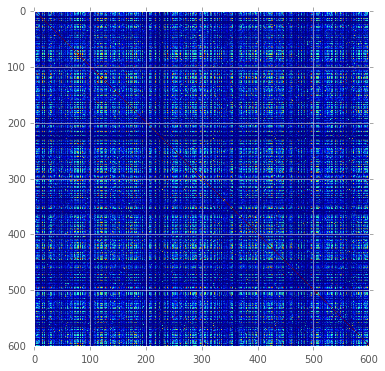

In [236]:
plt.imshow(G)

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащюей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке

In [228]:
from sklearn.metrics import accuracy_score

In [233]:
G_test = string_kernel(X_test, X_train)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [234]:
# Your Code Here
C = [0.1, 1, 10, 100, 1000]
for c in C:
    model = SVC(C=c, kernel='precomputed')
    model.fit(G, y_train)
    y_hat_train = model.predict(G)
    y_hat_test = model.predict(G_test)
    acc_train = accuracy_score(y_train, y_hat_train)
    acc_test = accuracy_score(y_test, y_hat_test)
    print "C=%f, accuracy_train=%f, accuracy_test=%f" % (c, acc_train, acc_test)

C=0.100000, accuracy_train=0.715000, accuracy_test=0.745000
C=1.000000, accuracy_train=0.866667, accuracy_test=0.800000
C=10.000000, accuracy_train=0.868333, accuracy_test=0.795000
C=100.000000, accuracy_train=0.853333, accuracy_test=0.767500
C=1000.000000, accuracy_train=0.853333, accuracy_test=0.772500
